# 🧾 Apriori Algorithm: From Concept to Code

**Goal:** Learn what Apriori is, how it works, why its results make sense in data mining, and how to interpret frequent itemsets and association rules in Python.

**You will:**
1) Build a small transaction dataset  
2) One-hot encode it for Apriori  
3) Mine frequent itemsets with different supports  
4) Generate association rules and filter by confidence/lift  
5) Interpret results and run “what-if” experiments


## 0. Setup & Imports

We’ll use `pandas` for data handling and `mlxtend` for Apriori and association rule helpers.  
If `mlxtend` isn’t installed, run the cell below.


In [1]:
# If needed, uncomment to install:
# !pip install -q mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

pd.set_option("display.max_colwidth", None)


## 1. What is Apriori? (Concept)

**Apriori** is a frequent itemset mining algorithm. It relies on the **Apriori property**:

> If an itemset is frequent, **all of its subsets** must also be frequent.  
> Contraposition: If an itemset is **not** frequent, none of its supersets can be frequent.

**Pipeline:**
1. Count support for single items; keep those ≥ `min_support`.
2. Join them to form 2-item candidates; count support; prune.
3. Repeat for size 3, 4, … until no more frequent sets.
4. Generate **association rules** from frequent itemsets and evaluate with **confidence** and **lift**.

- **Support**: fraction of transactions containing an itemset.  
- **Confidence**: P(consequent | antecedent).  
- **Lift**: Confidence divided by the baseline frequency of the consequent; >1 means positive association beyond chance.
- 
## 2. Build a Small Transaction Dataset

We’ll start with a toy “market basket” dataset. Feel free to edit or expand.



In [2]:
transactions = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'diapers', 'beer', 'bread'],
    ['bread', 'diapers', 'beer', 'cola'],
    ['milk', 'bread', 'diapers', 'beer'],
    ['milk', 'eggs'],
    ['bread', 'eggs'],
    ['milk', 'cola', 'chips'],
    ['bread', 'butter'],
    ['milk', 'butter', 'bread'],
]

print(f"Number of transactions: {len(transactions)}")
for i, t in enumerate(transactions[:5], start=1):
    print(f"T{i}: {t}")


Number of transactions: 10
T1: ['milk', 'bread', 'eggs']
T2: ['milk', 'bread']
T3: ['milk', 'diapers', 'beer', 'bread']
T4: ['bread', 'diapers', 'beer', 'cola']
T5: ['milk', 'bread', 'diapers', 'beer']


## 3. One-Hot Encode the Transactions

`mlxtend`’s `TransactionEncoder` converts a list of lists into a boolean (0/1) matrix that Apriori expects.


In [3]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
print("One hot encoded dataset (True means item present in the transaction:)")
display(df.head())

One hot encoded dataset (True means item present in the transaction:)


,beer,bread,butter,chips,cola,diapers,eggs,milk
0,False,True,False,False,False,False,True,True
1,False,True,False,False,False,False,False,True
2,True,True,False,False,False,True,False,True
3,True,True,False,False,True,True,False,False
4,True,True,False,False,False,True,False,True


## 4. Mine Frequent Itemsets with Apriori

Start with a reasonable `min_support`.  
Try changing it (e.g., `0.3`, `0.5`, `0.6`) and see how the results change.


In [10]:
min_support = 0.3  # <-- experiment here

frequent_itemsets = apriori(
    df,
    min_support=min_support,
    use_colnames=True  # show item labels instead of column indices
)
# Sort by length then support for readability
frequent_itemsets['itemset_len'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets = frequent_itemsets.sort_values(["itemset_len", "support"], ascending=[True, False])

print(f"Frequent itemsets with min_support = {min_support}:")
display(frequent_itemsets)


Frequent itemsets with min_support = 0.3:


,support,itemsets,itemset_len
1,0.8,(bread),1
4,0.7,(milk),1
0,0.3,(beer),1
2,0.3,(diapers),1
3,0.3,(eggs),1
8,0.5,"(milk, bread)",2
5,0.3,"(beer, bread)",2
6,0.3,"(beer, diapers)",2
7,0.3,"(diapers, bread)",2
9,0.3,"(beer, diapers, bread)",3


In [11]:
min_support = 0.5  # <-- experiment here

frequent_itemsets = apriori(
    df,
    min_support=min_support,
    use_colnames=True  # show item labels instead of column indices
)
# Sort by length then support for readability
# Your code:
frequent_itemsets['itemset_len'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets = frequent_itemsets.sort_values(["itemset_len", "support"], ascending=[True, False])

print(f"Frequent itemsets with min_support = {min_support}:")
display(frequent_itemsets)

Frequent itemsets with min_support = 0.5:


,support,itemsets,itemset_len
0,0.8,(bread),1
1,0.7,(milk),1
2,0.5,"(milk, bread)",2


In [35]:
min_support = 0.6  # <-- experiment here

frequent_itemsets = apriori(
    df,
    min_support=min_support,
    use_colnames=True  # show item labels instead of column indices
)
# Sort by length then support for readability
# Your code:
frequent_itemsets['itemset_len'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets = frequent_itemsets.sort_values(["itemset_len", "support"], ascending=[True, False])

print(f"Frequent itemsets with min_support = {min_support}:")
display(frequent_itemsets)

Frequent itemsets with min_support = 0.6:


,support,itemsets,itemset_len
0,0.8,(bread),1
1,0.7,(milk),1


### Why these results match Apriori
- Itemsets appear only if **all their subsets** were also frequent at previous levels.
- Lowering `min_support` admits more itemsets (including larger ones), while raising it prunes aggressively.

## 5. Generate Association Rules

We convert frequent itemsets into rules and compute **confidence** and **lift**.  
Filter rules to show only informative ones (e.g., confidence ≥ 0.6).


In [34]:

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6
).sort_values(["confidence", "lift"], ascending=False)

print("All rules (filtered by confidence >= 0.6):")
cols_to_show = ["antecedents", "consequents", "support", "confidence", "lift",]
display(rules[cols_to_show].reset_index(drop=True))


All rules (filtered by confidence >= 0.6):


,antecedents,consequents,support,confidence,lift
0,(beer),(diapers),0.3,1.000000,3.333333
1,(diapers),(beer),0.3,1.000000,3.333333
2,"(beer, bread)",(diapers),0.3,1.000000,3.333333
3,"(bread, diapers)",(beer),0.3,1.000000,3.333333
4,(beer),"(bread, diapers)",0.3,1.000000,3.333333
5,(diapers),"(beer, bread)",0.3,1.000000,3.333333
6,(beer),(bread),0.3,1.000000,1.250000
7,(diapers),(bread),0.3,1.000000,1.250000
8,"(beer, diapers)",(bread),0.3,1.000000,1.250000
9,(milk),(bread),0.5,0.714286,0.892857


### Interpreting the metrics
- **support**: fraction of all transactions containing `antecedents ∪ consequents`
- **confidence**: P(consequents | antecedents)
- **lift**: confidence / support(consequents).  
  - If **lift > 1** → positive association beyond chance  
  - If **lift ≈ 1** → independent  
  - If **lift < 1** → negative association

## 7. Focus on High-Value Rules

Let’s filter to rules with **lift > 1** (stronger than chance) and **confidence ≥ 0.7**.


In [29]:
lift_min = 1.0
conf_min = 0.7

strong_rules = rules.query("lift > @lift_min and confidence >= @conf_min") \
                    .sort_values(["lift","confidence"], ascending=False)

print(f"Rules with lift > {lift_min} and confidence >= {conf_min}:")
display(strong_rules[cols_to_show].reset_index(drop=True))


Rules with lift > 1.0 and confidence >= 0.7:


,antecedents,consequents,support,confidence,lift
0,(beer),(diapers),0.3,1.0,3.333333
1,(diapers),(beer),0.3,1.0,3.333333
2,"(beer, bread)",(diapers),0.3,1.0,3.333333
3,"(bread, diapers)",(beer),0.3,1.0,3.333333
4,(beer),"(bread, diapers)",0.3,1.0,3.333333
5,(diapers),"(beer, bread)",0.3,1.0,3.333333
6,(beer),(bread),0.3,1.0,1.250000
7,(diapers),(bread),0.3,1.0,1.250000
8,"(beer, diapers)",(bread),0.3,1.0,1.250000


# Implementing Apriori algorithm in Python

[Apriori Algorithm](https://www.geeksforgeeks.org/machine-learning/apriori-algorithm/) is a machine learning algorithm used for market basket analysis. It helps to find associations or relationships between items in large transactional datasets. A common real-world application is product recommendation where items are suggested to users based on their shopping cart contents. Companies like Walmart have used this algorithm to improve product suggestions and drive sales.

In this article we’ll do step-by-step implementation of the Apriori algorithm in Python using the mlxtend library.

### Step 1: Importing Required Libraries
Before we begin we need to import the necessary Python libraries like Pandas , Numpy and mlxtend.

In [36]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

### Step 2: Loading and exploring the data
We start by loading a popular groceries dataset. This dataset contains customer transactions with details like customer ID, transaction date, and the item purchased.

In [2]:
import pandas as pd
df = pd.read_csv("Groceries_dataset.csv")
print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


Each row represents one item in a customer's basket on a given date.
To use the Apriori algorithm we must convert this into full transactions per customer per visit.

### Step 3: Group Items by Transaction
We group items purchased together by the same customer on the same day to form one transaction.

In [3]:
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
print(transactions)

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables'], ['frankfurter', 'curd'], ['sausage', 'whole milk', 'rolls/buns'], ['whole milk', 'soda'], ['beef', 'white bread'], ['frankfurter', 'soda', 'whipped/sour cream'], ['frozen vegetables', 'other vegetables'], ['butter', 'whole milk'], ['tropical fruit', 'sugar'], ['butter milk', 'specialty chocolate'], ['sausage', 'rolls/buns'], ['root vegetables', 'detergent'], ['frozen meals', 'dental care'], ['rolls/buns', 'rolls/buns'], ['dish cleaner', 'cling film/bags'], ['canned beer', 'frozen fish'], ['other vegetables', 'hygiene articles'], ['pip fruit', 'whole milk', 'tropical fruit'], ['rolls/buns', 'red/blush wine', 'chocolate'], ['other vegetables', 'shopping bags'], ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'], ['root vegetables', 'whole milk', 'pastry'], ['rolls/buns

In [4]:
basket

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


### Step 4: Convert to One-Hot Format
Apriori needs data in True/False format like Did the item appear in the basket?. We use Transaction Encoder for this:


In [7]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [8]:
df_encoded.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


### Step 5: Run Apriori Algorithm
Now we find frequent itemsets combinations of items that often occur together. Here min_support=0.01 means itemsets that appear in at least 1% of transactions. This gives us common combinations of items.

In [9]:
from mlxtend.frequent_patterns import apriori
# Your code:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print('Total Frequent Itemsets:', frequent_itemsets.shape[0])

Total Frequent Itemsets: 69


In [12]:
frequent_itemsets.head(10)

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
5,0.060683,(bottled water)
6,0.037626,(brown bread)
7,0.035220,(butter)
8,0.017577,(butter milk)
9,0.014369,(candy)


### Step 6: Generate Association Rules
Now we find rules like If bread and butter are bought, milk is also likely to be bought.

- Support: How often the rule appears in the dataset.
- Confidence: Probability of buying item B if item A is bought.
- Lift: Strength of the rule over random chance. (>1 means it's a good rule)

In [13]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 4


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


### Step 7: Visualize the Most Popular Items
Let’s see which items are most frequently bought:

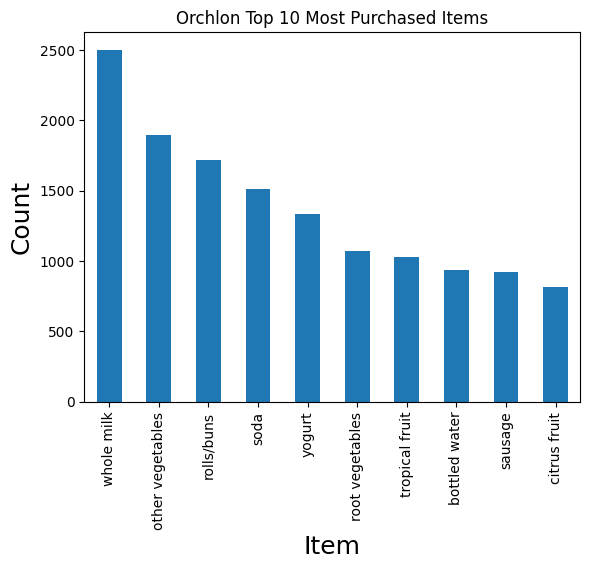

In [17]:
import matplotlib.pyplot as plt
top_items = df['itemDescription'].value_counts().head(10)

#Please add your name on title
top_items.plot(kind='bar', title='Orchlon Top 10 Most Purchased Items')

#Please set fontsize
plt.xlabel("Item", fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

As shown in the above output Whole milk is the most frequently bought item, followed by other vegetables, rolls/bun and soda.